In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,f1_score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

Una empresa de suscripción online quiere predecir si un cliente va a abandonar el servicio (churn = 1) o no (churn = 0).
Para ello dispone de datos históricos de clientes con información demográfica y de uso del servicio.

Tu objetivo es construir, entrenar y evaluar un modelo de regresión logística que permita estimar la probabilidad de abandono de un cliente.

Se te proporciona un dataset llamado churn.csv con las siguientes variables:

- State: Estado donde reside el cliente
- Account Length: número de días que el cliente lleva con la companía
- Area Code: código de área telefónica del cliente
- Phone: número de teléfono del cliente
- Int'l Plan: indica si el cliente tiene contratado un plan internacional
- Vmail Plan: indica si el cliente tiene servicio de buzón de voz
- Vmail Message: número de mensajes de voz recibidos
- Day Mins: minutos de llamadas realizadas durante el día
- Day Calls: número de llamadas realizadas durante el día
- Day Charge: coste total de las llamadas diurnas.
- Eve Mins: minutos de llamadas realizadas por la tarde
- Eve Calls: número de llamadas realizadas por la tarde
- Eve Charge: coste de las llamadas por la tarde
- Night Mins: minutos de llamadas realizadas por la noche
- Night Calls: número de llamadas nocturnas
- Night Charge: coste de las llamadas nocturnas
- Int'l Mins: minutos de llamadas internacionales
- Int'l Calls: número de llamadas internacionales
- Int'l Charge: coste de las llamadas internacionales
- CustServ Calls: número de llamadas al servicio de atención al cliente
- Churn?: indica si el cliente ha abandonado la compania (1) o permanece (0)


### Bloque 1 - análisis inicial

Comprueba:
- Dimensiones del dataset
- Tipos de datos
- Missing values
- Calcula estadísticas descriptivas básicas
- Valores únicos de cada variable

In [2]:
# 1. Cargar el dataset
df = pd.read_csv("churn.csv")
# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower()

In [3]:
# 2. Primer vistazo a los datos
display(df.head())
print(df.columns)

# 3. Dimensiones del dataset
print("Dimensiones del dataset (filas, columnas):")
print(df.shape)


,state,account length,area code,phone,int'l plan,vmail plan,vmail message,day mins,day calls,day charge,...,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Index(['state', 'account length', 'area code', 'phone', 'int'l plan',
       'vmail plan', 'vmail message', 'day mins', 'day calls', 'day charge',
       'eve mins', 'eve calls', 'eve charge', 'night mins', 'night calls',
       'night charge', 'intl mins', 'intl calls', 'intl charge',
       'custserv calls', 'churn?'],
      dtype='object')
Dimensiones del dataset (filas, columnas):
(3333, 21)


In [4]:
# 4. Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# 5. Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 6. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

# 7. Distribución de la variable objetivo
print("\nDistribución de la variable 'churn':")
print(df["churn?"].value_counts())

print("\nDistribución porcentual de 'churn':")
print(df["churn?"].value_counts(normalize=True) * 100)


Tipos de datos:
state              object
account length      int64
area code           int64
phone              object
int'l plan         object
vmail plan         object
vmail message       int64
day mins          float64
day calls           int64
day charge        float64
eve mins          float64
eve calls           int64
eve charge        float64
night mins        float64
night calls         int64
night charge      float64
intl mins         float64
intl calls          int64
intl charge       float64
custserv calls      int64
churn?             object
dtype: object

Valores nulos por columna:
state             0
account length    0
area code         0
phone             0
int'l plan        0
vmail plan        0
vmail message     0
day mins          0
day calls         0
day charge        0
eve mins          0
eve calls         0
eve charge        0
night mins        0
night calls       0
night charge      0
intl mins         0
intl calls        0
intl charge       0
custserv calls 

,account length,area code,vmail message,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



Distribución de la variable 'churn':
churn?
False.    2850
True.      483
Name: count, dtype: int64

Distribución porcentual de 'churn':
churn?
False.    85.508551
True.     14.491449
Name: proportion, dtype: float64


In [5]:
# 8. Valores únicos de cada variable
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())



Columna: state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Columna: account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  

### Bloque 2 - limpieza

- Elimina columnas que no consideres relevantes
- Convierte las variables de dos categorías en variables binarias de 0 y 1
- Identifica las variables categóricas

In [6]:
df = df.drop(columns=["state", "phone", "area code"])

In [7]:
# Variables binarias
df["churn?"] = df["churn?"].map({"True.": 1, "False.": 0})
df["int'l plan"] = df["int'l plan"].map({"yes": 1, "no": 0})
df["vmail plan"] = df["vmail plan"].map({"yes": 1, "no": 0})

print("Distribución de clases:")
print(df["churn?"].value_counts(normalize=True) * 100)

Distribución de clases:
churn?
0    85.508551
1    14.491449
Name: proportion, dtype: float64


### Bloque 3 - preparación de los datos

- Comprueba si la variable objetivo (churn) está balanceada o desbalanceada

- Separa el dataset en variables explicativas (X) y variable objetivo (y) manteniendo la proporción original de las clases

- Divide los datos en train y test (por ejemplo 80/20)

- Escala las variables explicativas (utiliza la clase StandardScaler de scikit-learn)

In [8]:
X = df.copy().drop(columns=["churn?"])
y = df["churn?"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**¿Por qué es importante ajustar el StandardScaler solo con los datos de entrenamiento?**

Porque el conjunto de test debe representar datos nuevos y desconocidos para el modelo.
Si el StandardScaler se ajusta usando también los datos de test, se estaría utilizando información del futuro para preparar los datos de entrenamiento.

Esto rompe la separación entre entrenamiento y evaluación y hace que el rendimiento del modelo parezca mejor de lo que realmente es.

**¿Qué tipo de error se produciría si se ajustara también con los datos de test?**

Se produciría un data leakage (fuga de información).

En concreto:

- Las medias y desviaciones usadas para escalar incluirían información del conjunto de test.

- El modelo estaría indirectamente “viendo” los datos de test durante el entrenamiento.

- Las métricas obtenidas en test serían optimistas y poco realistas.

### Bloque 4 - Entrenamiento

- Entrena el modelo de regresión logística usando el conjunto de entrenamiento con 2000 iteraciones.

- Extrae los coeficientes y el intercepto

Responde:
- ¿Qué variable parece aumentar más el riesgo de churn?

In [11]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [12]:
intercepto = model.intercept_
print(intercepto)

[-2.30405131]


In [13]:
coeficientes = model.coef_

coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coeficiente": model.coef_[0]
})

coef_df.sort_values(by="coeficiente", ascending=False)

,feature,coeficiente
16,custserv calls,0.676851
1,int'l plan,0.615039
6,day charge,0.326479
4,day mins,0.326043
3,vmail message,0.227820
7,eve mins,0.153815
9,eve charge,0.152484
15,intl charge,0.133090
13,intl mins,0.126076
10,night mins,0.071424


### Bloque 5 - Evalúa el modelo

- Construye la matriz de confusión

- Calcula precisión, recall, F1-score

- Calcula ROC, AUC Score y representalo en una gráfica

In [14]:
y_pred = model.predict(X_test_scaled)
#print(y_pred)

y_proba = model.predict_proba(X_test_scaled)[:, 1]
#print(y_proba)

Solución:
- predict_proba -> dice "qué tan probable es"
- predict -> dice "qué decido finalmente" tras aplicar el umbral (por defecto 0.5)

In [15]:
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))



Matriz de confusión:
[[553  13]
 [ 83  18]]


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.5806451612903226
Recall: 0.1782178217821782
F1-score: 0.2727272727272727


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print("AUC Score:", auc_score)


AUC Score: 0.8329951369695273


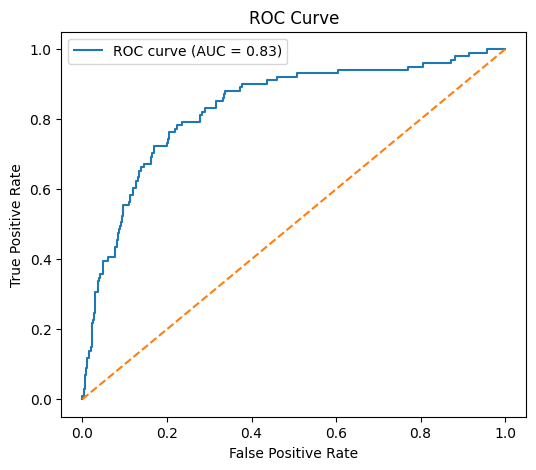

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Bloque 6 - Umbral de decisión
- Prueba a cambiar el umbral de decisión (prueba con 0.5, 0.3 y 0.7) y compara las matrices de confusión y las métricas obtenidas

### Bloque 7 - Clases balanceadas

2.  Dataset balanceado (50% / 50%): genera un nuevo dataset con clases balanceadas y vuelve a entrenar y evaluar el modelo (obtén las métricas)

3. Ahora, prueba a entrenar otra con los datos originales y al entrenar utiliza el parámetro class_weight="balanced". Evalúa este modelo (obtén las métricas)

Compara las métricas de los 3 modelos:
- Sin balancear (dataset original)
- Balanceado (50/50)
- Utilizando parámetro class_weight = "balanced" con los datos originales